In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, filters
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_PCA(X, k):
    # Standardize the data
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    
    # Choose the number of principal components (k)
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_standardized)

    # Calculate gradient magnitude for each image
    gradient_magnitude = np.array([np.sum(filters.sobel(image)) for image in X_standardized])
    
    return X_pca, gradient_magnitude


if __name__ == "__main__":
    classes = ["H1", "H2", "H3", "H5", "H6"]
    k = 50
    flattened_images = []
    class_labels = []

    for cls in classes:
        image_directory = "../defungi/" + cls

        for filename in os.listdir(image_directory):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(image_directory, filename)
                img = io.imread(image_path)

                # Resize the image to a smaller resolution (e.g., 64x64)
                resized_img = transform.resize(img, (64, 64))

                if len(resized_img.shape) == 3:
                    resized_img = color.rgb2gray(resized_img)

                flattened_img = resized_img.flatten()
                flattened_images.append(flattened_img)
                class_labels.append(cls)

    X = np.array(flattened_images)

    # Apply PCA and display visuals
    X_pca, gradient_magnitude = apply_PCA(X, k)

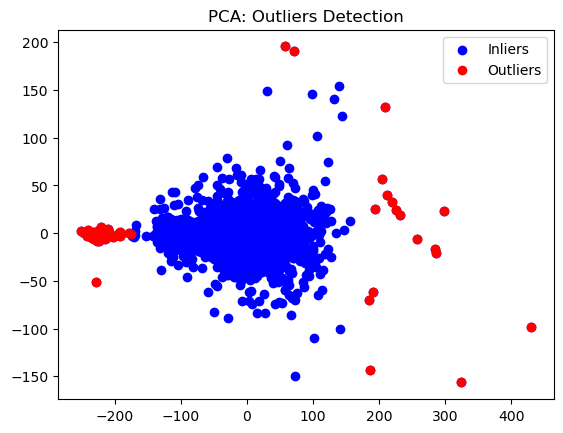

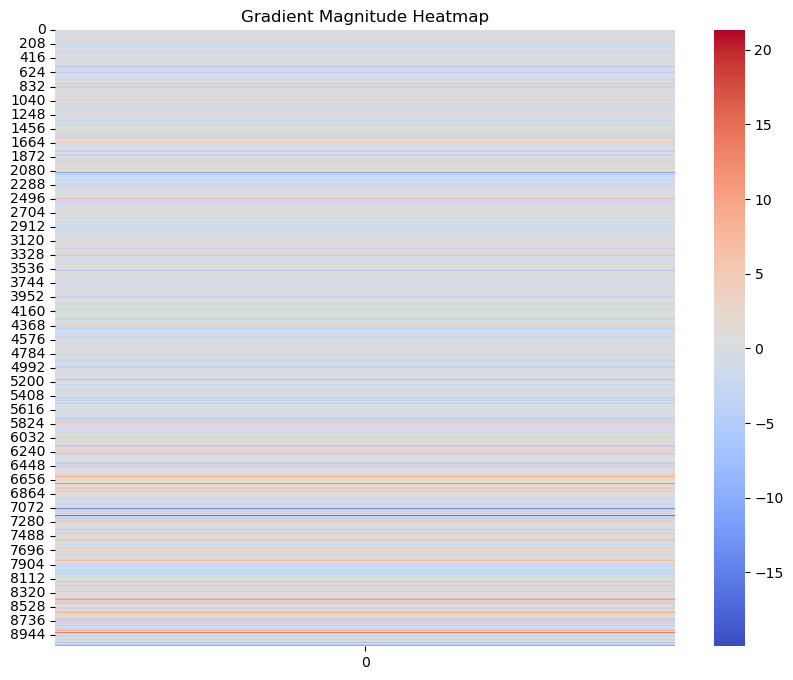

In [22]:
# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Inliers')

# Identify outliers based on a threshold (adjust as needed)
outlier_threshold = 175.0
outliers = np.where(np.abs(X_pca) > outlier_threshold)

# Mark outliers in red
plt.scatter(X_pca[outliers[0], 0], X_pca[outliers[0], 1], c='red', label='Outliers')

plt.legend()
plt.title('PCA: Outliers Detection')
plt.show()

# Reshape gradient magnitude
gradient_magnitude = gradient_magnitude.reshape(-1, 1)

# Visualize gradient magnitude on the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gradient_magnitude, cmap='coolwarm', annot=False)
plt.title('Gradient Magnitude Heatmap')
plt.show()

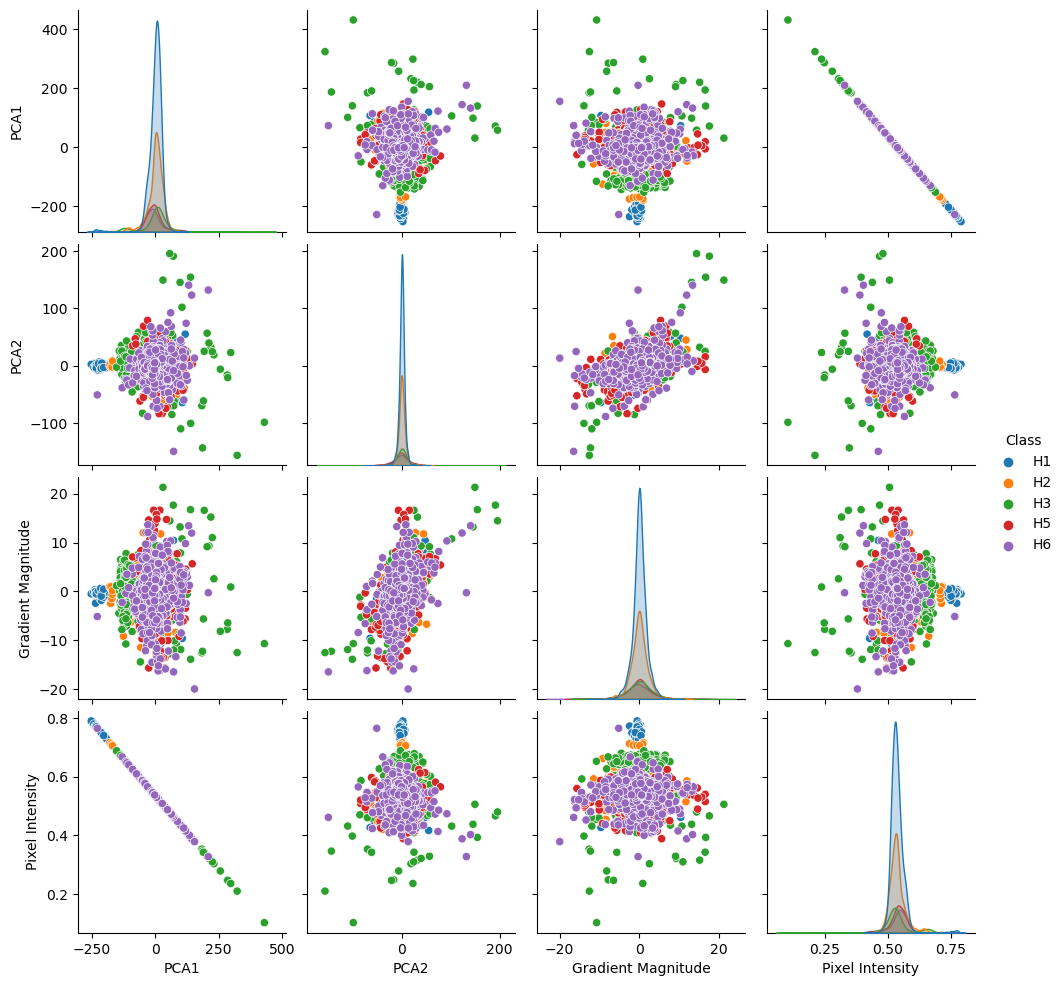

In [23]:
import pandas as pd

# Create a DataFrame for pairplot
df_pairplot = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1],
                            'Gradient Magnitude': gradient_magnitude.flatten(),
                            'Pixel Intensity': X.mean(axis=1),
                            'Class': class_labels})

# Construct pairplot with hue based on class
sns.pairplot(df_pairplot, hue='Class')
plt.show()